### Task 1: Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Task 2: Data Visualization

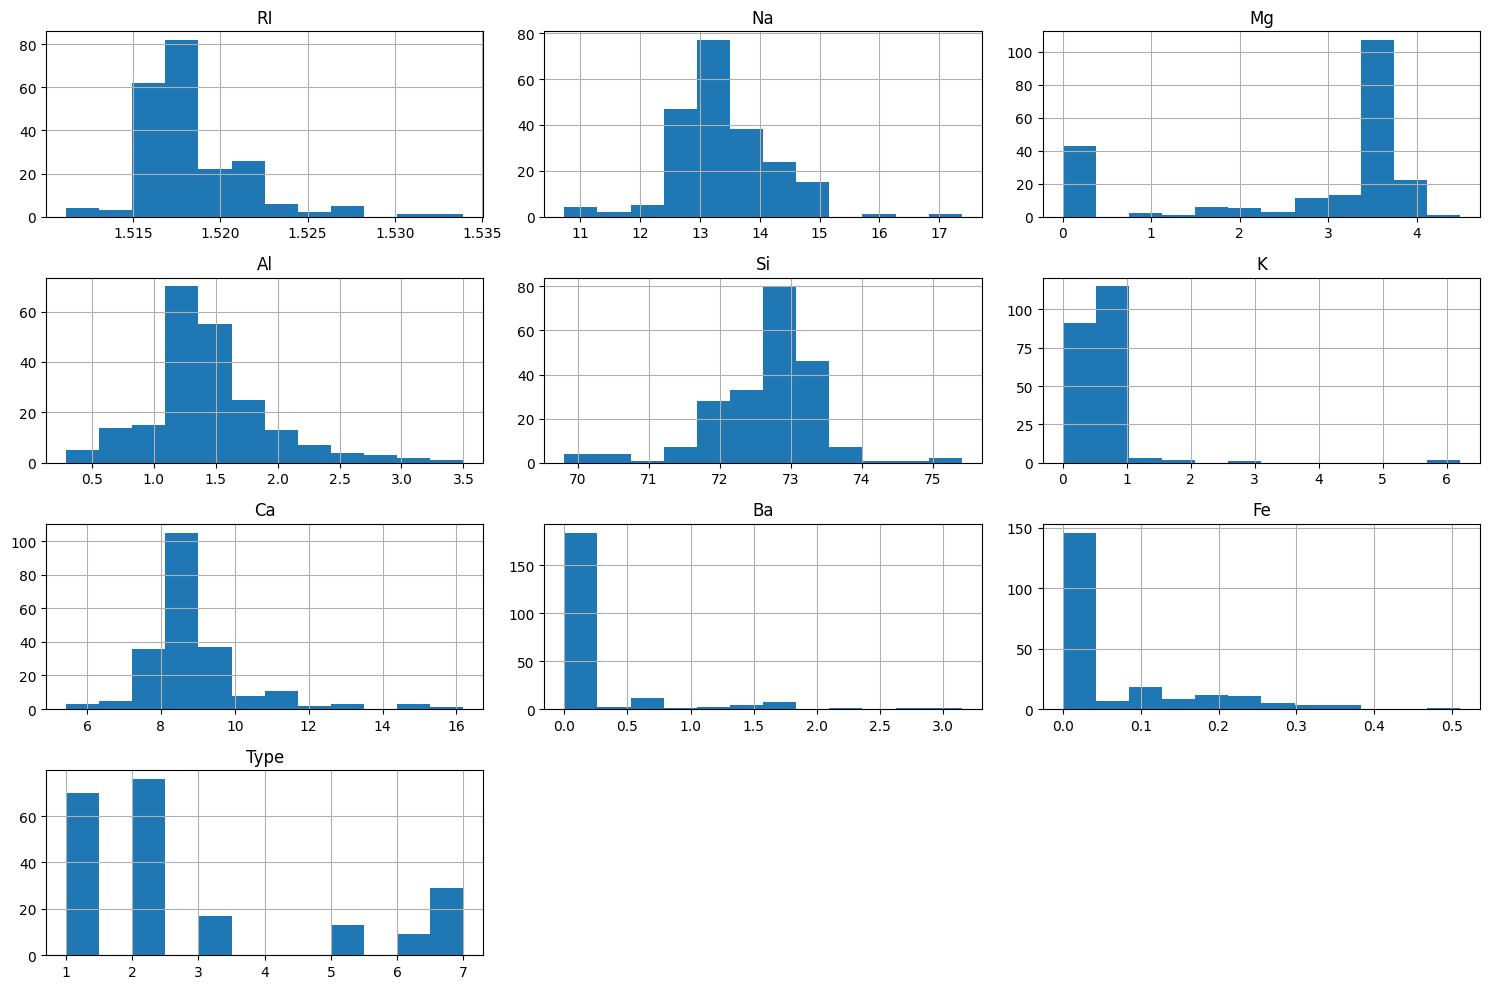

In [9]:
df.hist(bins=12, figsize=(15,10))
plt.tight_layout()
plt.show()

Most of the columns in the dataset is right skewed except Magnesium, Silicon and Type

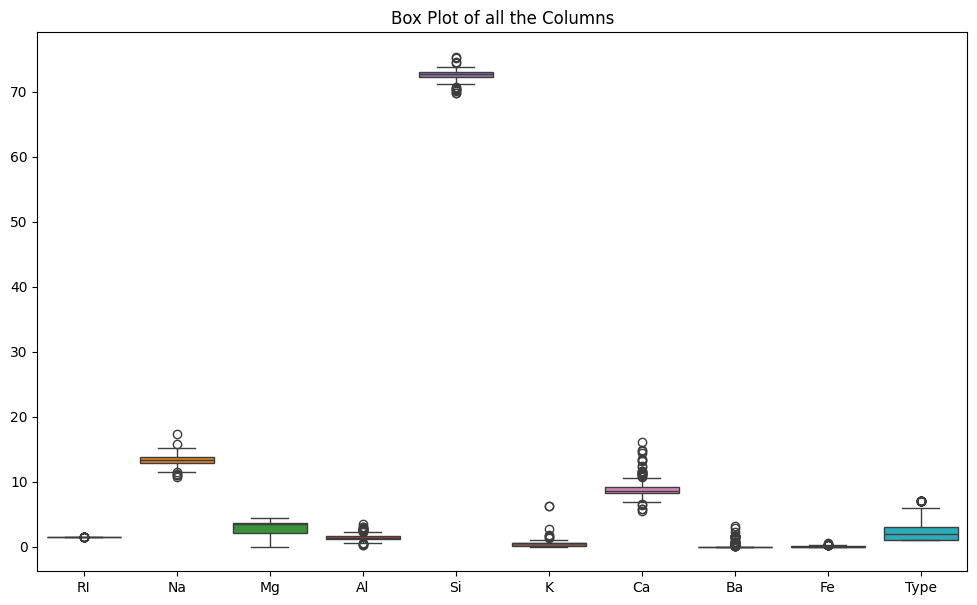

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df)
plt.title("Box Plot of all the Columns")
plt.show()

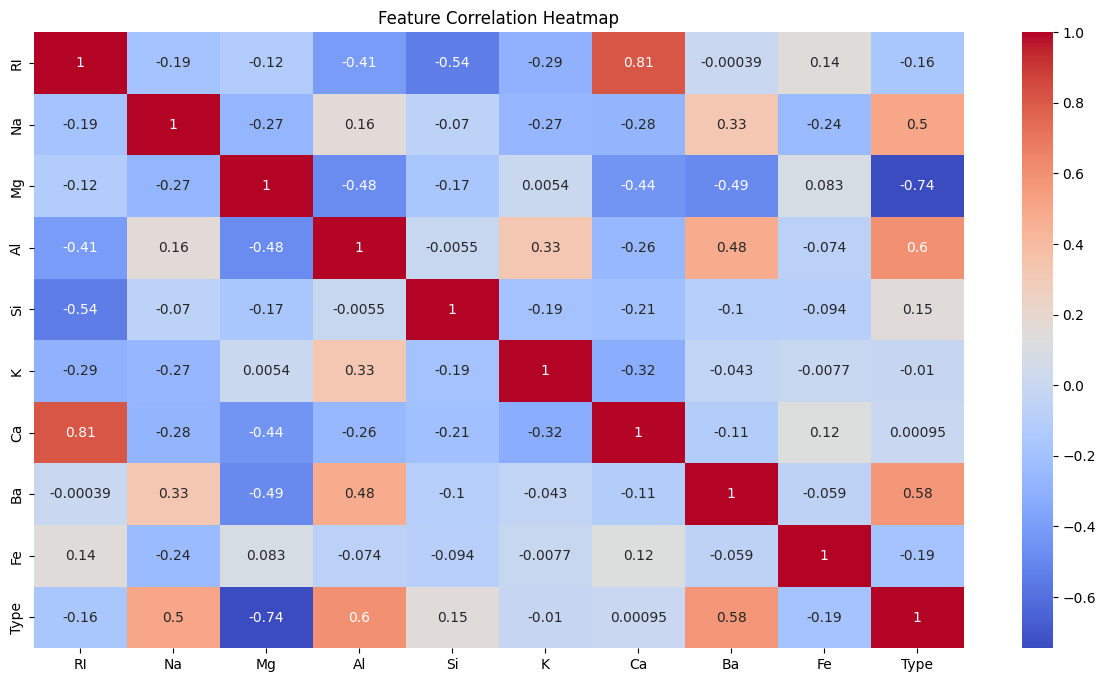

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

- Calcium exhibits a strong positive correlation with the Refractive Index, while it exhibits a - negative correlation with Silicon and Aluminum.
- Sodium exhibits a moderately positive correlation with Type and a negative correlation with most of - the features.
- Magnesium exhibits a highly negative correlation with Type and a moderately negative correlation with - Barium, Calcium, and Aluminum.
- Aluminum positively correlates with Type, Barium, and Potassium.

### Task 3: Data Preprocessing

In [12]:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.iloc[:, :-1]
y = df['Type']

In [15]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Task 4: Random Forest Model Implementation

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
cr = classification_report(y_true=y_test, y_pred=y_pred1)
print(cr)

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



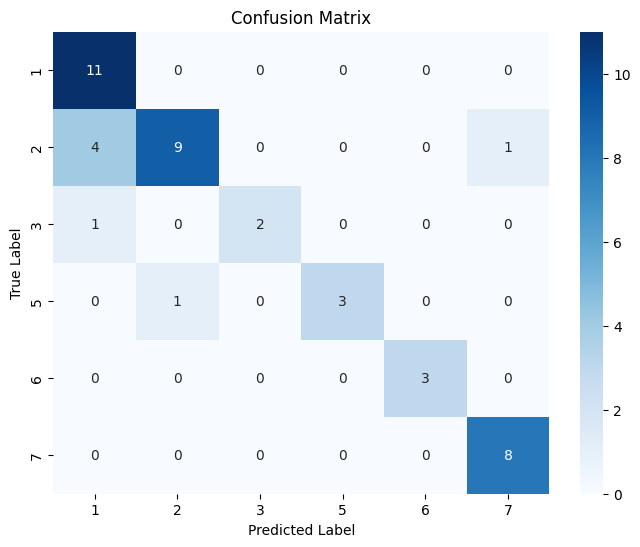

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
results = cross_val_score(model2, X_train, y_train, cv=kfold)
print(results.mean())

0.7189542483660131


### Task 5: Bagging and Boosting Methods

In [23]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [24]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_bag = bagging.predict(X_test)
cr2 = classification_report(y_test, y_bag)
print(cr2)

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.86      0.86      0.85        43



In [25]:
boost = AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
boost.fit(X_train, y_train)
y_boost = boost.predict(X_test)
cr3 = classification_report(y_test, y_boost)
print(cr3)

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.85      0.79      0.81        14
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.87      0.83      0.83        43
weighted avg       0.87      0.86      0.85        43



## All three models perform pretty well with 84% - 86% accuracy. Adaboost can give the best precision, while bagging is better in recall for minority classes.

### Interview Questions

##### 1. Explain Bagging and Boosting methods. How are they different from each other?

- Bagging and boosting are both ensemble techniques used to build multiple models and improve their performance by combining them.

- Bagging

    - It trains multiple independent models, such as Decision Trees, on random subsets of the data and averages or votes their predictions. Popular Model: Random Forest

- Boosting

    - It trains models sequentially, where each model focuses more on the errors of the previous ones.

##### 2. Explain how to handle imbalance in the data.

Strategies to handle imbalances are:

- Resampling Technique
    - Oversampling: Adding more copies or synthetic data for minority classes.
    - Undersampling: Remove samples from minority classes.

- Evaluation Metrics
    - Avoiding accuracy and using precision, recall, f1-score, confusion matrix, ROC-AUC score.

  
- Class Weight
    - Using class_weight = 'balanced' in models like randomforestclassifier()